In [1]:
using Revise

In [2]:
using ComputationalHeatTransfer

In [3]:
using Plots
using LaTeXStrings

Note: All temperatures here represent $T - T_0$, where $T_0$ is the undisturbed temperature of the plate. 

### Physical parameters

In [123]:
ρ = 1;
c = 1;
k = 0.1;
d = 0.1;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(1.0, 1.0, 0.1, 0.1, 0.1)

In [124]:
xlim = (-2.0,2.0)
ylim = (-2.0,2.0)
Δx, Δt = setstepsizes(params.α,gridPe=0.1,fourier=200.0)

(0.010000000000000002, 0.02000000000000001)

### Set up the evaporator and condenser

In [125]:
eb = Rectangle(0.5,0.5,1.5*Δx)
Te = RigidTransform((-0.5,0.5),0.0)
Te(eb)
cb = Rectangle(0.5,0.5,1.5*Δx)
Tc = RigidTransform((0.5,-0.5),0.0)
Tc(cb)

qe = 10.0
hc = 10.0
Tc = -50.0

eparams = PrescribedHeatFluxRegion(qe,eb);
cparams = PrescribedHeatModelRegion(hc,Tc,cb);

### Set up the OHP

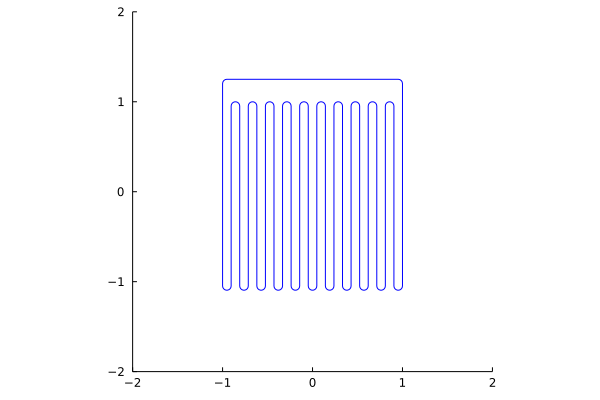

In [142]:
ds = 1.5Δx
nturn = 10
#pitch = 0.125
length = 2.0
height = 2.0
pitch = length/(2*nturn+1)
gap = 0.25
x0, y0 = -length/2, 1.25
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,0.0)
ohp = BasicBody(x,y)

plot(ohp,fillalpha=0,linecolor=:blue,xlims=xlim,ylims=ylim)

In [148]:
ohpgeom = ComputationalHeatTransfer.LineSourceParams(ohp)
qtmp = zeros(numpts(ohp));

### Create the system

In [176]:
#sys = HeatConduction(params,Δx,xlim,ylim,Δt,qflux=eparams,qmodel=cparams,qline=ohpgeom)
sys = HeatConduction(params,Δx,xlim,ylim,Δt,qline=ohpgeom)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


#### Initialize state, and create the integrator

In [177]:
u0 = newstate(sys)
tspan = (0.0,1.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Primal nodes in a (nx = 416, ny = 416) cell grid of type Float64 data
  Number of Primal nodes: (nx = 415, ny = 415), Float64[])

### Set up values for the OHP heat flux per unit length and advance the solution

In [178]:
fill!(qtmp,-1.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


In [181]:
step!(integrator,1.0)

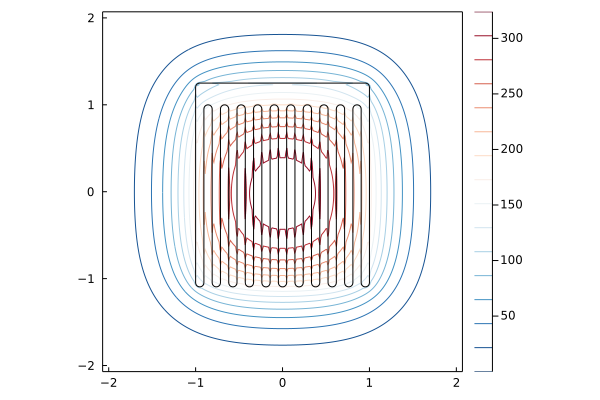

In [183]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))
plot!(ohp,fillalpha=0,linecolor=:black)

### Now change the values for the OHP heat flux per unit length and advance further

In [154]:
fill!(qtmp,-10.0)
set_linesource_strength!(sys,qtmp)

Unbounded Heat conduction system on a grid of size 416 x 416 and 0 static immersed points


In [155]:
step!(integrator,1.0)

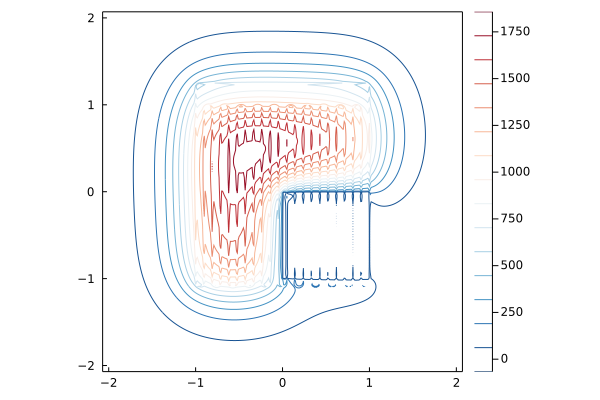

In [156]:
plot(temperature(integrator),sys.grid,legend=true,color=cgrad(:RdBu,rev=true))

### Plot the temperature along the OHP channel

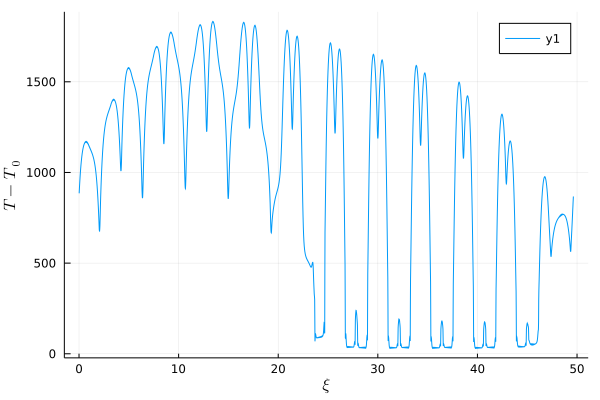

In [157]:
plot(sys.qline[1].arccoord,temperature_linesource(integrator),xlabel=L"\xi",ylabel=L"T - T_0")